# Implement simple linear Regression and plot the graph

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('1.car driving risk analysis.csv')
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [7]:
x=df[['speed']]  #only 3rd bracket,,two dimension for input means independent variable
y=df['risk']     #only 3rd bracket,,one dimension for outpu means dependent variable

In [8]:
x

,speed
0,200
1,90
2,300
3,110
4,240
5,115
6,50
7,230
8,190
9,260


In [9]:
y

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

# Visualization


Text(0.5, 1.0, 'Car driving speed risk')

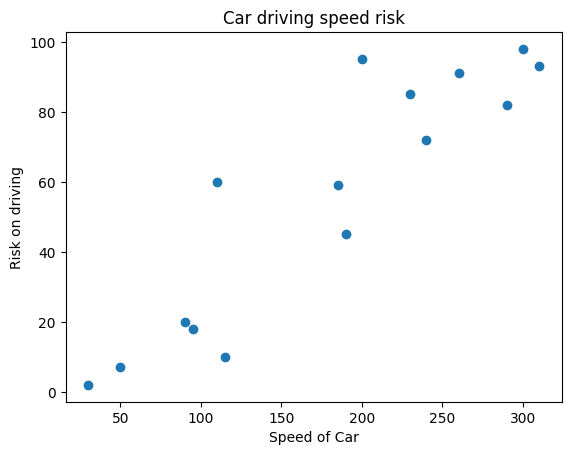

In [10]:
#It's optional
plt.scatter(df['speed'],df['risk'])
plt.xlabel('Speed of Car')
plt.ylabel('Risk on driving')
plt.title('Car driving speed risk')


In [1]:
from sklearn.model_selection import train_test_split

# training section 
60% For training and 40% for testing

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.40,random_state=1)

In [13]:
xtest

,speed
3,110
7,230
6,50
2,300
10,290
4,240


In [14]:
ytrain

1     20
13    18
0     95
14     2
9     91
8     45
12    93
11    59
5     10
Name: risk, dtype: int64

In [15]:
ytest

3     60
7     85
6      7
2     98
10    82
4     72
Name: risk, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg=LinearRegression() #create object

In [18]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [19]:
reg.predict(xtest)  #compare with ytest

array([ 27.15301215,  73.82259334,   3.81822156, 101.04651569,
        97.15738393,  77.7117251 ])

In [20]:
ytest

3     60
7     85
6      7
2     98
10    82
4     72
Name: risk, dtype: int64

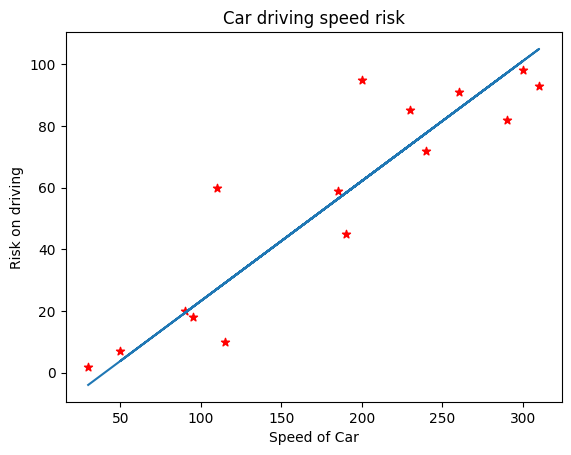

In [21]:
plt.scatter(df['speed'],df['risk'],marker='*',color='red')
plt.xlabel('Speed of Car')
plt.ylabel('Risk on driving')
plt.title('Car driving speed risk')
plt.plot(df.speed,reg.predict(df[['speed']]))

In [22]:
reg.predict([[150]])

C:\Users\MD.NAIM HOSSAIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.70953921])

In [23]:
reg.coef_

array([0.38891318])

In [24]:
reg.intercept_

-15.62743726501703

In [25]:
y=0.38891318*150-15.627437265017058
y

42.70953973498295

# Linear Regression Ses

# svm start with plot

In [26]:
#https://www.mltut.com/svm-implementation-in-python-from-scratch/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


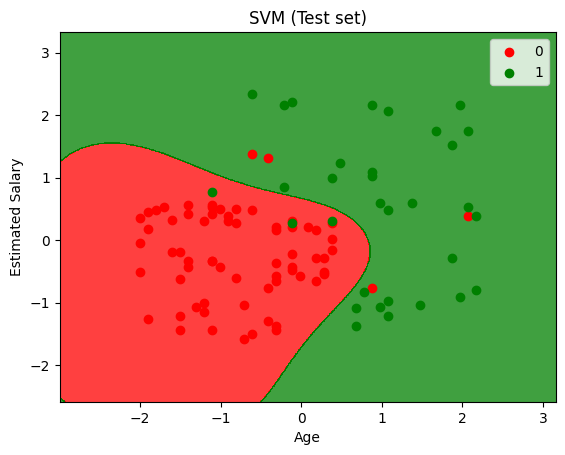

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()